## 데이터/라이브러리 불러오기

In [1]:
from google.colab import files
files = files.upload()

Saving kbo_data_2022.csv to kbo_data_2022.csv


In [45]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
!pip install category_encoders
!pip install eli5

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

!pip install matplotlib==3.1.3; 

plt.rc('font', family='NanumBarunGothic') 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 7 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 di

In [5]:
from category_encoders import OneHotEncoder
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression


In [6]:
# 포스트 시즌 진출 여부 데이터 
df = pd.read_csv('kbo_data_2022.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 73 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   WIN     112 non-null    object 
 1   POST    112 non-null    object 
 2   YEAR    112 non-null    int64  
 3   TEAM    112 non-null    object 
 4   AVG     112 non-null    float64
 5   G       112 non-null    int64  
 6   PA      112 non-null    int64  
 7   AB      112 non-null    int64  
 8   R       112 non-null    int64  
 9   H       112 non-null    int64  
 10  2B      112 non-null    int64  
 11  3B      112 non-null    int64  
 12  HR      112 non-null    int64  
 13  TB      112 non-null    int64  
 14  RBI     112 non-null    int64  
 15  SAC     112 non-null    int64  
 16  SF      112 non-null    int64  
 17  BB      112 non-null    int64  
 18  IBB     112 non-null    int64  
 19  HBP     112 non-null    int64  
 20  SO      112 non-null    int64  
 21  GDP     112 non-null    int64  
 22  SL

## 데이터 살펴보기

In [7]:
df.head()

,WIN,POST,YEAR,TEAM,AVG,G,PA,AB,R,H,...,PB,SB_A,CS_A,CS%,SBA,SB,CS,SB%,OOB,PKO.1
0,N,N,2010,넥센,0.262,133,5139,4452,570,1165,...,9,160,68,29.8,191,135,56,70.7,56,5
1,N,Y,2010,두산,0.281,133,5252,4538,731,1276,...,8,119,44,27.0,189,128,61,67.7,56,12
2,N,Y,2010,롯데,0.288,133,5261,4673,773,1345,...,6,131,62,32.1,175,124,51,70.9,62,7
3,N,Y,2010,삼성,0.272,133,5287,4436,681,1207,...,6,134,65,32.7,213,158,55,74.2,54,8
4,N,N,2010,한화,0.244,133,5009,4321,543,1053,...,7,151,58,27.8,191,121,70,63.4,56,11


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
YEAR,112.0,2015.776786,3.405639,2010.000,2013.00000,2016.0000,2019.000,2021.000
AVG,112.0,0.274509,0.015821,0.237,0.26175,0.2755,0.288,0.309
G,112.0,139.071429,6.570085,128.000,133.00000,144.0000,144.000,144.000
PA,112.0,5450.223214,298.276693,4866.000,5150.25000,5540.5000,5697.500,5870.000
AB,112.0,4759.687500,288.165025,4271.000,4436.75000,4878.0000,4995.250,5176.000
...,...,...,...,...,...,...,...,...
SB,112.0,107.598214,29.311763,47.000,88.00000,105.0000,121.750,204.000
CS,112.0,48.214286,11.938603,23.000,39.00000,47.0000,56.000,83.000
SB%,112.0,68.690179,5.151820,55.800,65.87500,69.2000,71.875,80.700
OOB,112.0,52.526786,7.904794,33.000,47.75000,53.0000,58.000,72.000


In [9]:
df.columns

Index(['WIN', 'POST', 'YEAR', 'TEAM', 'AVG', 'G', 'PA', 'AB', 'R', 'H', '2B',
       '3B', 'HR', 'TB', 'RBI', 'SAC', 'SF', 'BB', 'IBB', 'HBP', 'SO', 'GDP',
       'SLG', 'OBP', 'OPS', 'MH', 'RISP', 'PH-BA', 'ERA', 'W', 'L', 'SV',
       'HLD', 'WPCT', 'IP', 'H_A', 'HR_A', 'BB_A', 'HBP_A', 'SO_A', 'R_A',
       'ER', 'WHIP', 'CG', 'SHO', 'QS', 'BSV', 'TBF', 'NP', 'AVG_A', '2B_A',
       '3B_A', 'SAC_A', 'SF_A', 'IBB_A', 'WP', 'BK', 'E', 'PKO', 'PO', 'A',
       'DP', 'FPCT', 'PB', 'SB_A', 'CS_A', 'CS%', 'SBA', 'SB', 'CS', 'SB%',
       'OOB', 'PKO.1'],
      dtype='object')

## 데이터 정리

In [10]:
# 시즌 중간에 도출해낼 수 있는 데이터로 baseline 모델 feature
features  = ['AVG', 'OPS', 'RISP', 'PH-BA', 'ERA', 'WHIP','FPCT']

In [11]:
# 
list(df.loc[df['WIN'] == 1, features])

['AVG', 'OPS', 'RISP', 'PH-BA', 'ERA', 'WHIP', 'FPCT']

In [12]:
# 시즌 우승팀의 평균 데이터 추출
df_win = df.loc[df['WIN'] == 'Y', features].mean()
df_win

AVG      0.286333
OPS      0.793750
RISP     0.294917
PH-BA    0.224917
ERA      4.112500
WHIP     1.376667
FPCT     0.984000
dtype: float64

In [13]:
# 포스트 시즌 진출 성공팀의 평균 데이터 추출
df_post = df.loc[df['POST'] == 'Y', features].mean()
df_post

AVG      0.280455
OPS      0.781091
RISP     0.287909
PH-BA    0.232200
ERA      4.334727
WHIP     1.413091
FPCT     0.982727
dtype: float64

In [14]:
df_total = df.loc[:, features]

In [15]:
# 모든 팀들의 평균 데이터 추출
df_total = df.loc[:, features].mean()
df_total

AVG      0.274509
OPS      0.760875
RISP     0.279277
PH-BA    0.227634
ERA      4.658304
WHIP     1.465268
FPCT     0.981938
dtype: float64

In [16]:
# 평균 데이터들로 새로운 데이터 프레임 만들기
df_feature = pd.DataFrame(zip(features, df_win, df_post, df_total), columns = ['Category', 'WIN', 'POST', 'Total'])
df_feature

,Category,WIN,POST,Total
0,AVG,0.286333,0.280455,0.274509
1,OPS,0.793750,0.781091,0.760875
2,RISP,0.294917,0.287909,0.279277
3,PH-BA,0.224917,0.232200,0.227634
4,ERA,4.112500,4.334727,4.658304
5,WHIP,1.376667,1.413091,1.465268
6,FPCT,0.984000,0.982727,0.981938


In [17]:
#
graph_df = df_feature.melt(id_vars='Category')
graph_df = graph_df.rename(columns=str.title)
graph_df

,Category,Variable,Value
0,AVG,WIN,0.286333
1,OPS,WIN,0.793750
2,RISP,WIN,0.294917
3,PH-BA,WIN,0.224917
4,ERA,WIN,4.112500
5,WHIP,WIN,1.376667
6,FPCT,WIN,0.984000
7,AVG,POST,0.280455
8,OPS,POST,0.781091
9,RISP,POST,0.287909


/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52572 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45936 missing from current font.
  font.set_

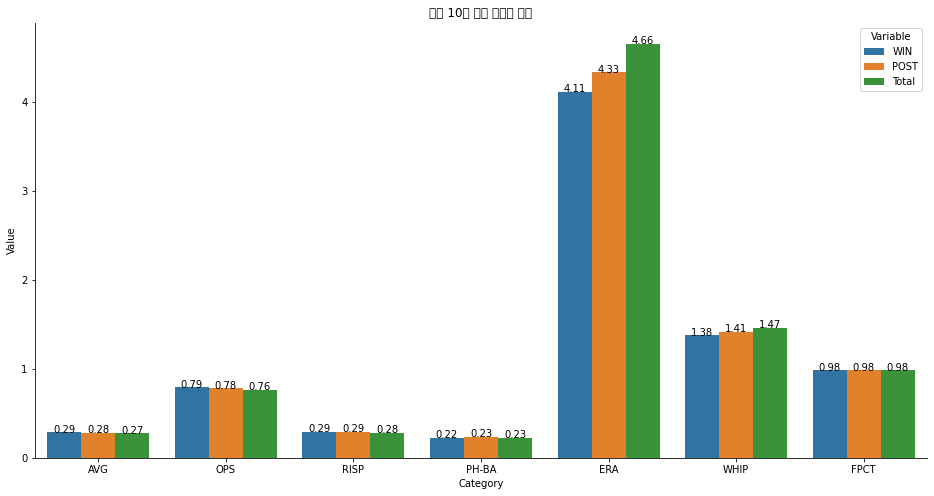

In [46]:
# 2010년부터 2021년간 평균 기록 비교
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16, 8))
ax.set_title("최근 10년 평균 데이터 비교")
sns.barplot(x='Category', y='Value', hue='Variable', data=graph_df, ax=ax)
sns.despine(fig)


for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2

    label = '{:.2f}'.format(y_value)
    plt.annotate(label, (x_value, y_value), ha='center', fontsize=10)

plt.show();

세개의 데이터들이 거의 비슷한 차이를 가지고 있어, 이 7가지의 feature들로 팀의 포스트 시즌 진출 확률을 예측 가능할 것 으로 보임

In [19]:
# 포스트 시즌 진출 팀 데이터 Win = Y를 1로 N을 0으로 바꾸기
df['POST'] = df['POST'].map(lambda x: 0 if x == 'N' else 1)
df['WIN'] = df['WIN'].map(lambda x: 0 if x == 'N' else 1)

In [20]:
df

,WIN,POST,YEAR,TEAM,AVG,G,PA,AB,R,H,...,PB,SB_A,CS_A,CS%,SBA,SB,CS,SB%,OOB,PKO.1
0,0,0,2010,넥센,0.262,133,5139,4452,570,1165,...,9,160,68,29.8,191,135,56,70.7,56,5
1,0,1,2010,두산,0.281,133,5252,4538,731,1276,...,8,119,44,27.0,189,128,61,67.7,56,12
2,0,1,2010,롯데,0.288,133,5261,4673,773,1345,...,6,131,62,32.1,175,124,51,70.9,62,7
3,0,1,2010,삼성,0.272,133,5287,4436,681,1207,...,6,134,65,32.7,213,158,55,74.2,54,8
4,0,0,2010,한화,0.244,133,5009,4321,543,1053,...,7,151,58,27.8,191,121,70,63.4,56,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,0,0,2021,NC,0.261,144,5532,4808,702,1254,...,5,84,40,32.3,147,101,46,68.7,39,9
108,0,1,2021,키움,0.259,144,5653,4874,722,1262,...,5,85,35,29.2,123,97,26,78.9,39,3
109,0,1,2021,LG,0.250,144,5533,4750,654,1188,...,12,98,40,29.0,126,92,34,73.0,43,15
110,0,0,2021,KIA,0.248,144,5577,4831,568,1198,...,10,92,43,31.9,104,73,31,70.2,46,8


In [21]:
# Set target data frames
win_y = df['WIN']
post_y = df['POST']
post_y

0      0
1      1
2      1
3      1
4      0
      ..
107    0
108    1
109    1
110    0
111    0
Name: POST, Length: 112, dtype: int64

In [22]:
ratio_X = df[features]
ratio_X

,AVG,OPS,RISP,PH-BA,ERA,WHIP,FPCT
0,0.262,0.714,0.268,0.221,4.55,1.50,0.982
1,0.281,0.805,0.284,0.210,4.62,1.38,0.982
2,0.288,0.813,0.315,0.202,4.82,1.43,0.981
3,0.272,0.774,0.265,0.247,3.94,1.36,0.982
4,0.244,0.690,0.263,0.172,5.43,1.57,0.984
...,...,...,...,...,...,...,...
107,0.261,0.759,0.260,0.224,4.54,1.48,0.979
108,0.259,0.723,0.279,0.227,4.31,1.46,0.976
109,0.250,0.710,0.253,0.269,3.57,1.31,0.983
110,0.248,0.673,0.263,0.203,4.89,1.50,0.979


### 기준모델 만들기

In [23]:
# train/ test 데이터 나누기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ratio_X, win_y, test_size=.2)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((89, 7), (89,), (23, 7), (23,))

In [24]:
# 로지스틱 회귀분석을 사용해 baseline 생성
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(random_state=42))
])

In [25]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', LogisticRegression(random_state=42))])

In [26]:
test_preds = pipeline.predict(X_test)

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87        18
           1       0.50      0.20      0.29         5

    accuracy                           0.78        23
   macro avg       0.65      0.57      0.58        23
weighted avg       0.74      0.78      0.74        23



### 모델

0.9326797385620914
정확도 :  0.782608695652174


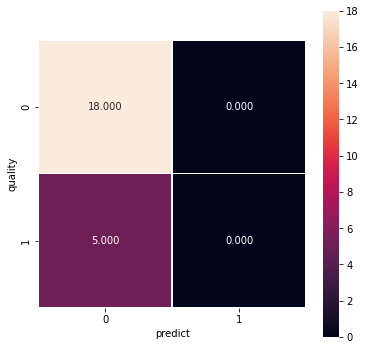

In [28]:
# 랜덤포레스트
from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.metrics import accuracy_score

forest=RandomForestClassifier(n_estimators=100, max_depth=12, min_samples_leaf = 3, min_samples_split = 10)

forest.fit(X_train, y_train)

forest_prediction = forest.predict(X_test)


kf = StratifiedKFold(n_splits=5, shuffle = True)
score = cross_val_score(forest, X_train, y_train, cv = kf, scoring="accuracy")
print(score.mean())

print("정확도 : ", accuracy_score(y_test,forest_prediction))

conf_mat = confusion_matrix(y_test,forest_prediction)

plt.figure(figsize=(6,6))
sns.heatmap(conf_mat, annot = True, fmt=".3f", linewidths=.5,square=True)
plt.ylabel("quality")
plt.xlabel("predict")
plt.show()

In [29]:
#랜덤포레스트에 RandomizedSearchCV적용
from sklearn.model_selection import RandomizedSearchCV
from category_encoders import TargetEncoder
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint, uniform

pipe = make_pipeline(
    TargetEncoder(), 
    SimpleImputer(), 
    RandomForestRegressor(random_state=2)
)

dists = {
    'targetencoder__smoothing': [2.,20.,50.,60.,100.,500.,1000.],
    'targetencoder__min_samples_leaf': randint(1, 10),     
    'simpleimputer__strategy': ['mean', 'median'], 
    'randomforestregressor__n_estimators': randint(50, 500), 
    'randomforestregressor__max_depth': [3, 5, 6, 7],
    'randomforestregressor__max_features': uniform(0, 1)
}

clf = RandomizedSearchCV(
    pipe,
    param_distributions=dists,
    n_iter=50,
    cv=6,
    scoring='f1',
    verbose=1,
    n_jobs=-1
)

clf.fit(X_train, y_train);


Fitting 6 folds for each of 50 candidates, totalling 300 fits


/usr/local/lib/python3.8/dist-packages/category_encoders/target_encoder.py:122: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in version 2.6."
/usr/local/lib/python3.8/dist-packages/category_encoders/target_encoder.py:127: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter smoothing will change in version 2.6."
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


In [30]:
print('최적 하이퍼파라미터: ', clf.best_params_)

최적 하이퍼파라미터:  {'randomforestregressor__max_depth': 7, 'randomforestregressor__max_features': 0.5694684227001532, 'randomforestregressor__n_estimators': 297, 'simpleimputer__strategy': 'median', 'targetencoder__min_samples_leaf': 6, 'targetencoder__smoothing': 20.0}


정확도 :  0.7391304347826086


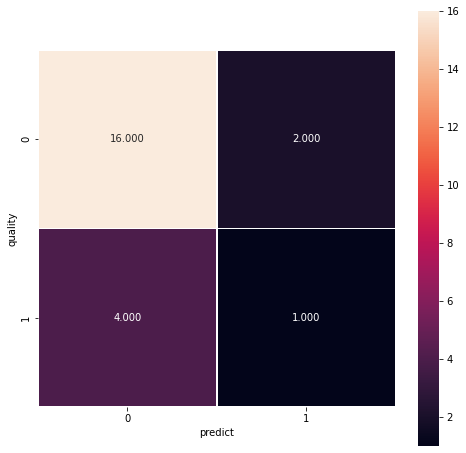

3 폴드세트 0.9773946360153257
4 폴드세트 0.9659090909090909
5 폴드세트 0.9549019607843137
6 폴드세트 0.9666666666666667
7 폴드세트 0.9652014652014653
8 폴드세트 0.9668560606060606
9 폴드세트 0.9222222222222223
10 폴드세트 0.9555555555555555


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=8.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=9.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(


In [31]:
from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold

dt_clf = DecisionTreeClassifier()
dt_clf = dt_clf.fit(X_train, y_train)
df_prediction = dt_clf.predict(X_test)

print("정확도 : ", accuracy_score(y_test,df_prediction))

conf_mat = confusion_matrix(y_test,df_prediction)

plt.figure(figsize=(8,8))
sns.heatmap(conf_mat, annot = True, fmt=".3f", linewidths=.5,square=True)
plt.ylabel("quality")
plt.xlabel("predict")
plt.show()


for i in range(3,11):
    kf = StratifiedKFold(n_splits=i, shuffle = True)
    score = cross_val_score(dt_clf, X_train, y_train, cv = kf, scoring="accuracy")
    print(i,"폴드세트",score.mean())

In [32]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(
    OrdinalEncoder(),  
    RandomForestClassifier( class_weight= 'balanced')
)

# 최적값을 구하고 싶은 파라미터를 정리 
dists = {
    'randomforestclassifier__max_depth' : [3,5,10,20],
    'randomforestclassifier__max_features' : [3,5,10],
    'randomforestclassifier__n_estimators' : [80, 100, 150, 200]
}

# RandomizedSearchCV 작성
clf= RandomizedSearchCV(
    pipe,
    param_distributions=dists, # 파라미터 입력
    n_iter = 1000,   # random search 탐색 횟수
    cv = 5,        # cv 검증을 위한 분할 검증 횟수
    scoring='f1',  # 오차 평가방법
    random_state = 42
  )

clf.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 48 is smaller than n_iter=1000. Running 48 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('ordinalencoder',
                                              OrdinalEncoder()),
                                             ('randomforestclassifier',
                                              RandomForestClassifier(class_weight='balanced'))]),
                   n_iter=1000,
                   param_distributions={'randomforestclassifier__max_depth': [3,
                                                                              5,
                                                                              10,
                                                                              20],
                                        'randomforestclassifier__max_features': [3,
                                                                                 5,
                                                                                 10],
                                        'randomforestclassifier

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.739
정확도 :  0.7391304347826086


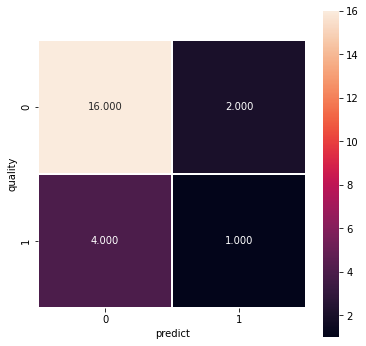

In [33]:
# 그라디언트 부스팅 모델

gbrt = GradientBoostingClassifier(random_state=48,learning_rate = 0.01)
gbrt.fit(X_train, y_train)

gbrt_prediction = gbrt.predict(X_test)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

print("정확도 : ", accuracy_score(y_test,gbrt_prediction))

conf_mat = confusion_matrix(y_test,gbrt_prediction)

plt.figure(figsize=(6,6))
sns.heatmap(conf_mat, annot = True, fmt=".3f", linewidths=.5,square=True)
plt.ylabel("quality")
plt.xlabel("predict")
plt.show()

정확도 :  0.7391304347826086
[[16  2]
 [ 4  1]]


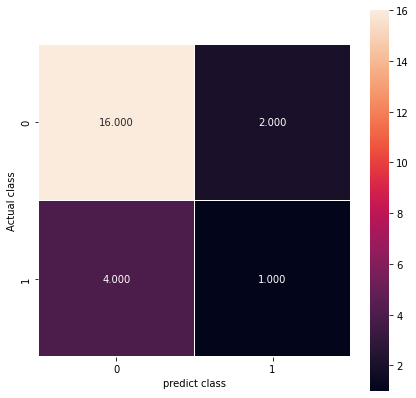

In [34]:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot

#xgb = XGBClassifier(n_estimators = 300, learning_rate = 1, max_depth = 4)
xgb = XGBClassifier(n_estimators = 300, learning_rate = 1, max_depth = 4,
                    eta=0.1, verbose=0, nthread=2)

xgb = XGBClassifier()
evals = [(X_test,y_test)]

#xgb.fit(X_train, Y_train, early_stopping_rounds = 100, eval_metric='logloss', eval_set = evals, verbose=True)
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

accuracy_score(y_test,y_pred)
print("정확도 : ",accuracy_score(y_test,y_pred))

conf_mat = confusion_matrix(y_test,y_pred)
print(confusion_matrix(y_test,y_pred))

plt.figure(figsize=(7,7))
sns.heatmap(conf_mat, annot = True, fmt=".3f", linewidths=.5,square=True)
plt.ylabel("Actual class")
plt.xlabel("predict class")
plt.show()

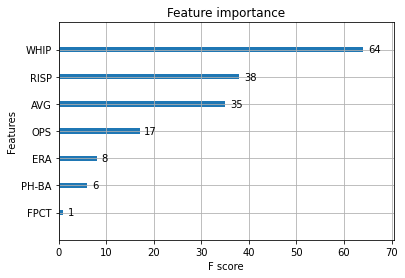

In [35]:
from xgboost import XGBClassifier, plot_importance

fig, ax = plt.subplots()
plot_importance(xgb, ax = ax)

### 우승 확률 예측하기

In [36]:
pipe = clf.best_estimator_
pipe

Pipeline(steps=[('targetencoder',
                 TargetEncoder(cols=[], min_samples_leaf=6, smoothing=20.0)),
                ('simpleimputer', SimpleImputer(strategy='median')),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=7,
                                       max_features=0.5694684227001532,
                                       n_estimators=297, random_state=2))])

In [37]:
model = pipe.fit(X_train, y_train)
print('검증 정확도:', pipe.score(X_test, y_test))

검증 정확도: 0.1092132196135186


In [38]:
# 실제 시즌 중 데이터
#['AVG', 'OPS', 'RISP', 'PH-BA', 'ERA', 'WHIP', 'FPCT']

stat_2022 = {
    'SK': [.254, .732, .272, .228, 3.87, 1.29, .980],
    'DOOSAN': [.255, .690, .266, .246, 4.45, 1.33, .978],
    'KIWOOM': [.252, .697, .243, .182, 3.79, 1.34, .979],
    'LG': [.269, .742, .274, .236, 3.33, 1.27, .983],
    'NC': [.257, .709, .265, .233, 3.90, 1.36, .976],
    'KT': [.254, .705, .239, .232, 3.51, 1.25, .982],
    'SAMSUNG': [.270, .721, .280, .273, 4.29, 1.44, .978],
    'KIA': [.272, .746, .273, .219, 4.20, 1.42, .980],
    'HANWHA':[.245, .671, .237, .211, 4.83, 1.51, .975],
    'LOTTE': [.267, .711, .259, .268, 4.45, 1.46, .978],
}

In [39]:
# 우승 확률 예측해보기
new_predicts_to_win = {}
for team, value in stat_2022.items():
    proba = pipeline.predict_proba([value])[0][1]*100
    new_predicts_to_win[team] = proba
    print(f'{team} :  {proba:.4}%')


SK :  4.283%
DOOSAN :  0.4576%
KIWOOM :  0.7311%
LG :  31.28%
NC :  1.049%
KT :  2.773%
SAMSUNG :  0.88%
KIA :  2.515%
HANWHA :  0.005111%
LOTTE :  0.1955%


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but Standa

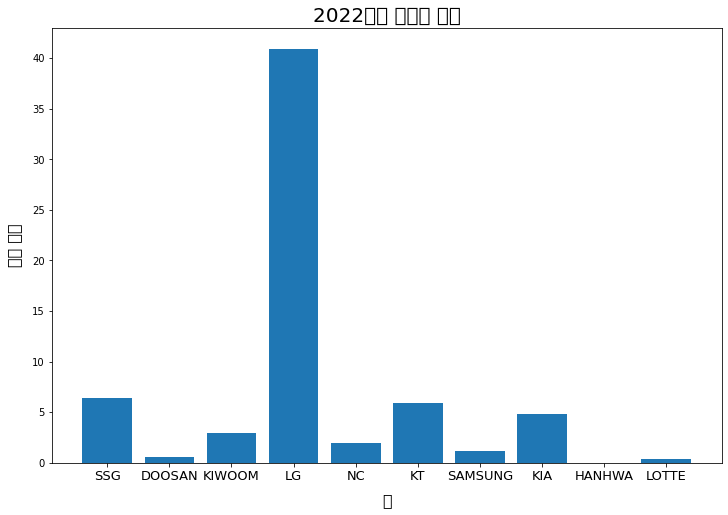

In [48]:
# 그래프로 시각화
import matplotlib.pyplot as plt
x = ['SSG','DOOSAN','KIWOOM','LG','NC','KT','SAMSUNG','KIA','HANHWA','LOTTE']
y = [6.37,0.556,2.972,40.93,1.995,5.87,1.137,4.824,0.0241,0.334]
plt.figure(figsize=(12,8))
plt.bar(x, y)
plt.xticks(fontsize=13)
plt.title('2022시즌 우승팀 예측', fontsize=20)
plt.xlabel('팀', labelpad=10, fontsize=16)
plt.ylabel('우승 확률', labelpad=10, fontsize=16)
plt.show();